In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.io as spio
import scipy.sparse.linalg as ll
import sklearn.preprocessing as skpp

In [2]:
# show image function
def show_image(centroids,H,W=None):
    if W == None: W = H
    N = centroids.shape[1]/(H*W)
    assert N == 3 or N == 1 # color and grey images
    
    K = centroids.shape[0]
    COLS = round(math.sqrt(K))
    ROWS = math.ceil(K/COLS)
    
    N = int(N)

    image = np.ones((ROWS*(H+1), COLS*(W+1), N))*100
    
    for i in range(centroids.shape[0]):
        r = math.floor(i / COLS)
        c = (i-1) % COLS

        image[(r*(H+1)+1):((r+1)*(H+1)),(c*(W+1)+1):((c+1)*(W+1)),:] = centroids[i,:W*H*N+1].reshape((H,W,N))
        
    plt.imshow(image[:,:,0])
    plt.show()

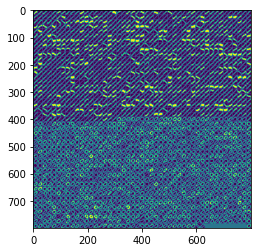

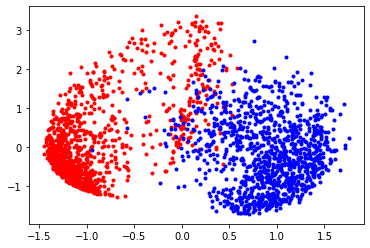

In [3]:
###########################
# PCA_digit main function #
###########################

usps = spio.loadmat('data/usps_all.mat',squeeze_me = True)['data']
pixelno = usps.shape[0]
digitno = usps.shape[1]
classno = usps.shape[2]

H = 16
W = 16

data = np.concatenate((usps[:,:,0],usps[:,:,9]),axis = 1).T

show_image(data,H,W)
# title: 'digit 1 and 0'

x0 = data.T.reshape((pixelno,digitno*2))
x = x0.astype(float)

y = np.concatenate((np.ones(digitno),2*np.ones(digitno)))
m1 = x.shape[1]
Anew1 = x

# PCA
mu1 = np.mean(Anew1,axis = 1)
xc1 = Anew1 - mu1[:,None]

C1 = np.dot(xc1,xc1.T)/m1

K = 2
S1,W1 = ll.eigs(C1,k = K)
S1 = S1.real
W1 = W1.real

dim1_1 = np.dot(W1[:,0].T,xc1)/math.sqrt(S1[0])
dim2_1 = np.dot(W1[:,1].T,xc1)/math.sqrt(S1[1])

digit_fig = plt.figure()
digit_fig.gca().plot(dim1_1[y == 1],dim2_1[y == 1],'r.')
digit_fig.gca().plot(dim1_1[y == 2],dim2_1[y == 2],'b.')
digit_fig.savefig('digit2.png')

#### We can observe that 0's and 1's are clustered separately along the two important principal components 